In [1]:
import pandas as pd
from plotnine import *
from scipy.stats import gmean
import matplotlib.pyplot as plt


This notebook contains breakdown analysis about the effect of `commutative optimization` and `w_degree`

In [42]:
result_canopus_chain = filter_vf2layout(pd.read_csv('../results/canopus-chain.csv'))
result_canopus_nocomm_chain = filter_vf2layout(pd.read_csv('../results/canopus_nocomm-chain.csv'))

result_canopus_hhex = filter_vf2layout(pd.read_csv('../results/canopus-hhex.csv'))
result_canopus_nocomm_hhex = filter_vf2layout(pd.read_csv('../results/canopus_nocomm-hhex.csv'))

result_canopus_square = filter_vf2layout(pd.read_csv('../results/canopus-square.csv'))
result_canopus_nocomm_square = filter_vf2layout(pd.read_csv('../results/canopus_nocomm-square.csv'))

ISA_TYPES = ['cx', 'zzphase', 'sqisw', 'zzphase_', 'sqisw_', 'het']

In [43]:
def plot_program_overhead_grouped(result_df1, result_df2, title="Program Overhead by ISA"):
    # 处理第一个数据框
    plot_data1 = (
        result_df1
        .melt(id_vars=['program', 'num_qubits'],
              value_vars=ISA_TYPES,
              var_name='ISA',
              value_name='Overhead')
        .assign(
            ISA=lambda df: pd.Categorical(df['ISA'], categories=ISA_TYPES, ordered=True),
            program=lambda df: pd.Categorical(df['program'],
                                            categories=result_df1['program'].tolist(),
                                            ordered=True),
            Method='Sabre'
        )
    )
    
    # 处理第二个数据框
    plot_data2 = (
        result_df2
        .melt(id_vars=['program', 'num_qubits'],
              value_vars=ISA_TYPES,
              var_name='ISA',
              value_name='Overhead')
        .assign(
            ISA=lambda df: pd.Categorical(df['ISA'], categories=ISA_TYPES, ordered=True),
            program=lambda df: pd.Categorical(df['program'],
                                            categories=result_df2['program'].tolist(),
                                            ordered=True),
            Method='Canopus'
        )
    )
    
    # 合并数据并创建组合变量
    plot_data = pd.concat([plot_data1, plot_data2])
    ISA_METHOD_TYPES = [f"{isa} (Sabre)" for isa in ISA_TYPES] + [f"{isa} (Canopus)" for isa in ISA_TYPES]
    plot_data['ISA_Method'] = plot_data['ISA'].astype(str) + ' (' + plot_data['Method'] + ')'
    plot_data['ISA_Method'] = pd.Categorical(
        plot_data['ISA_Method'],
        categories=ISA_METHOD_TYPES,
        ordered=True
    )


    
    
    # 创建颜色映射
    colors = ['#3498DB', '#2ECC71', '#F39C12', '#E74C3C', '#9B59B6', '#1ABC9C', '#7D3C98']
    color_map = {}
    for i, isa in enumerate(ISA_TYPES):
        color_map[f'{isa} (Sabre)'] = colors[i]
        color_map[f'{isa} (Canopus)'] = colors[i]

    # 创建绘图
    p = (
        ggplot(plot_data, aes(x='program', y='Overhead', fill='ISA_Method')) +
        
        # SABRE数据 - 实心条
        geom_bar(
            data=plot_data[plot_data['Method'] == 'Sabre'],
            stat='identity', 
            position=position_dodge(width=0.9),
            alpha=0.3,
            color='grey',
            # width=0.8
        ) +
        
        # Canopus数据 - 条纹效果
        geom_bar(
            data=plot_data[plot_data['Method'] == 'Canopus'],
            stat='identity', 
            position=position_dodge(width=0.9),
            alpha=0.8,
            # width=0.4,
            color='grey',
            size=0.3,
            # linetype='dotted'
        ) +
        
        scale_fill_manual(values=color_map, guide=False) +  # 隐藏组合图例
        
        # 手动添加图例
        guides(fill=guide_legend(title=f'{title} for different ISAs')) +
        
        labs(
            title=None, 
            x='', 
            y=''
        ) +
        theme_minimal() +
        theme(
            axis_text_x=element_text(rotation=15, hjust=2, size=12),
            axis_text_y=element_text(size=12),
            text=element_text(family='Comic Sans MS'),
            legend_title=element_text(size=14, face='bold'),
            legend_text=element_text(size=12),
            legend_position='top',
            legend_direction='horizontal',
            plot_title=element_text(size=14, face='bold'),
            figure_size=(13, 4)
        )
    )
    
    return p

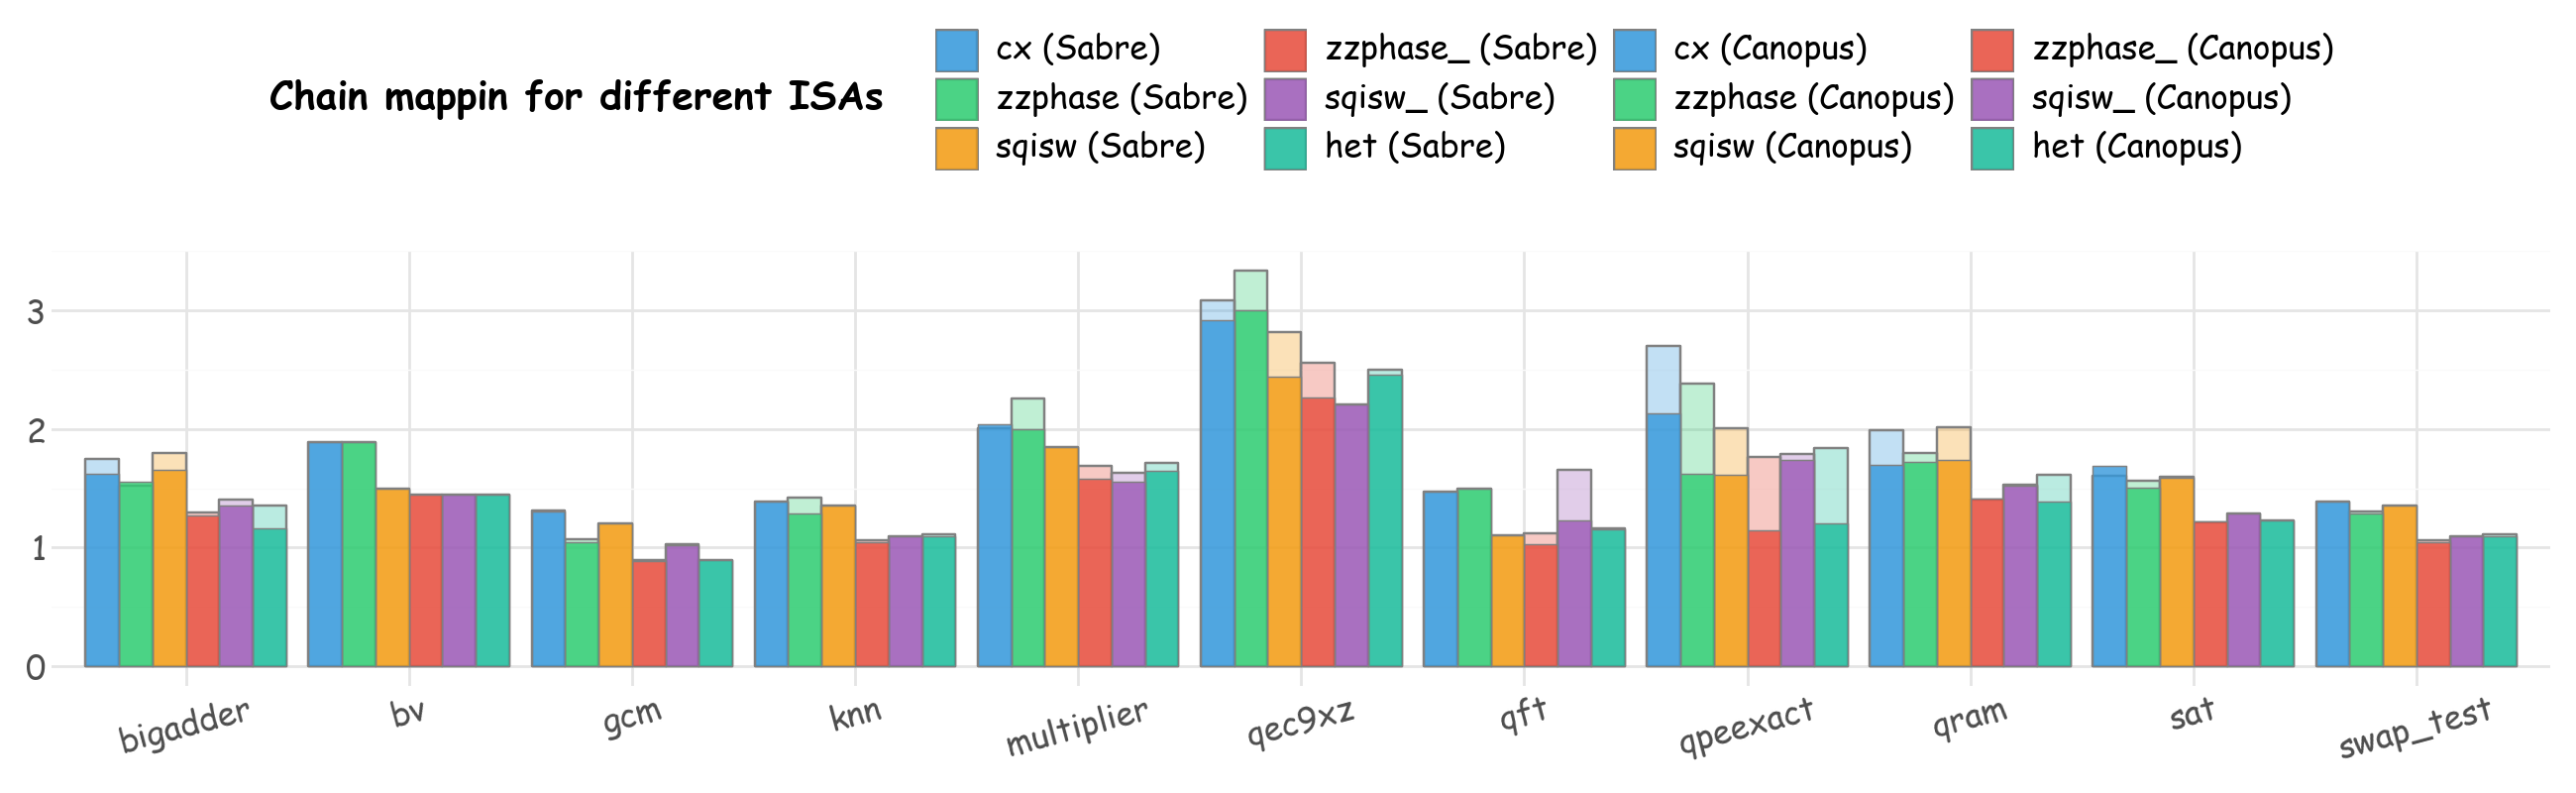

In [44]:
plot_program_overhead_grouped(result_canopus_nocomm_chain, result_canopus_chain, title='Chain mappin')

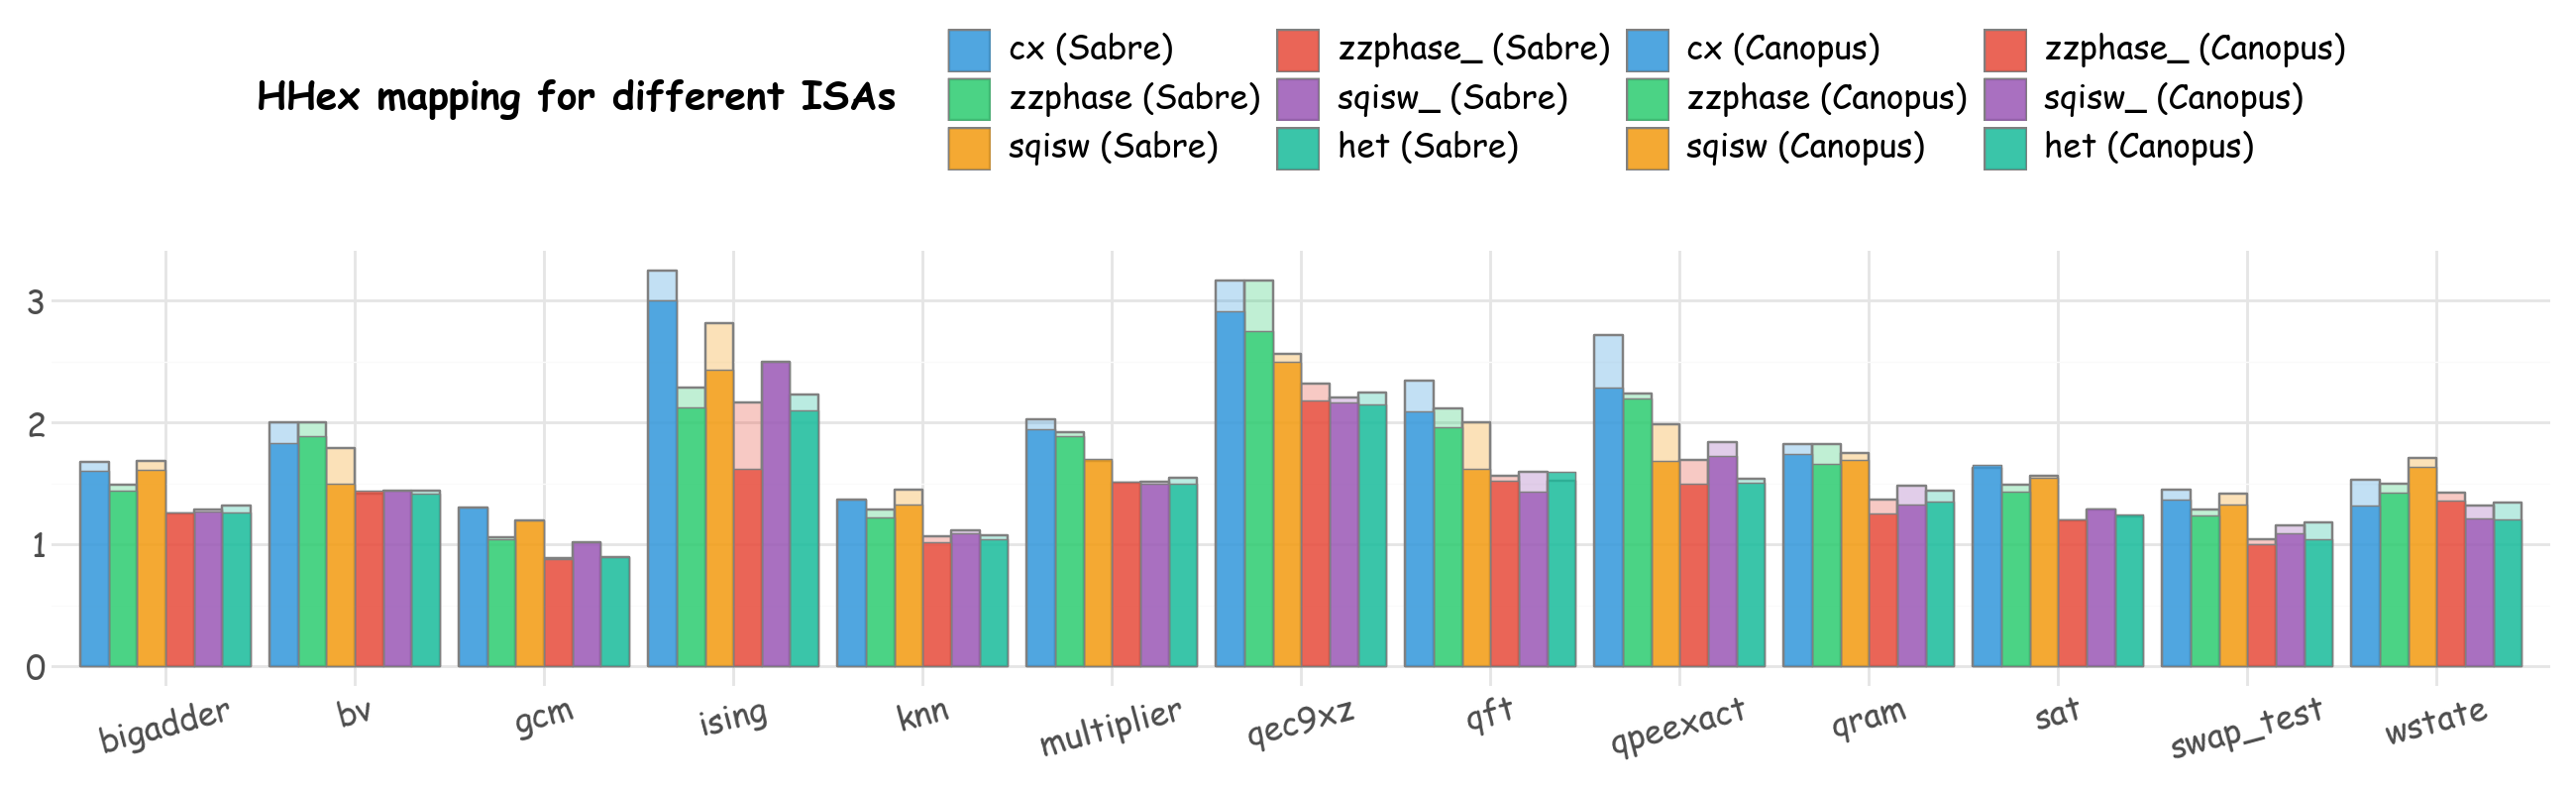

In [45]:
plot_program_overhead_grouped(result_canopus_nocomm_hhex, result_canopus_hhex, title='HHex mapping')

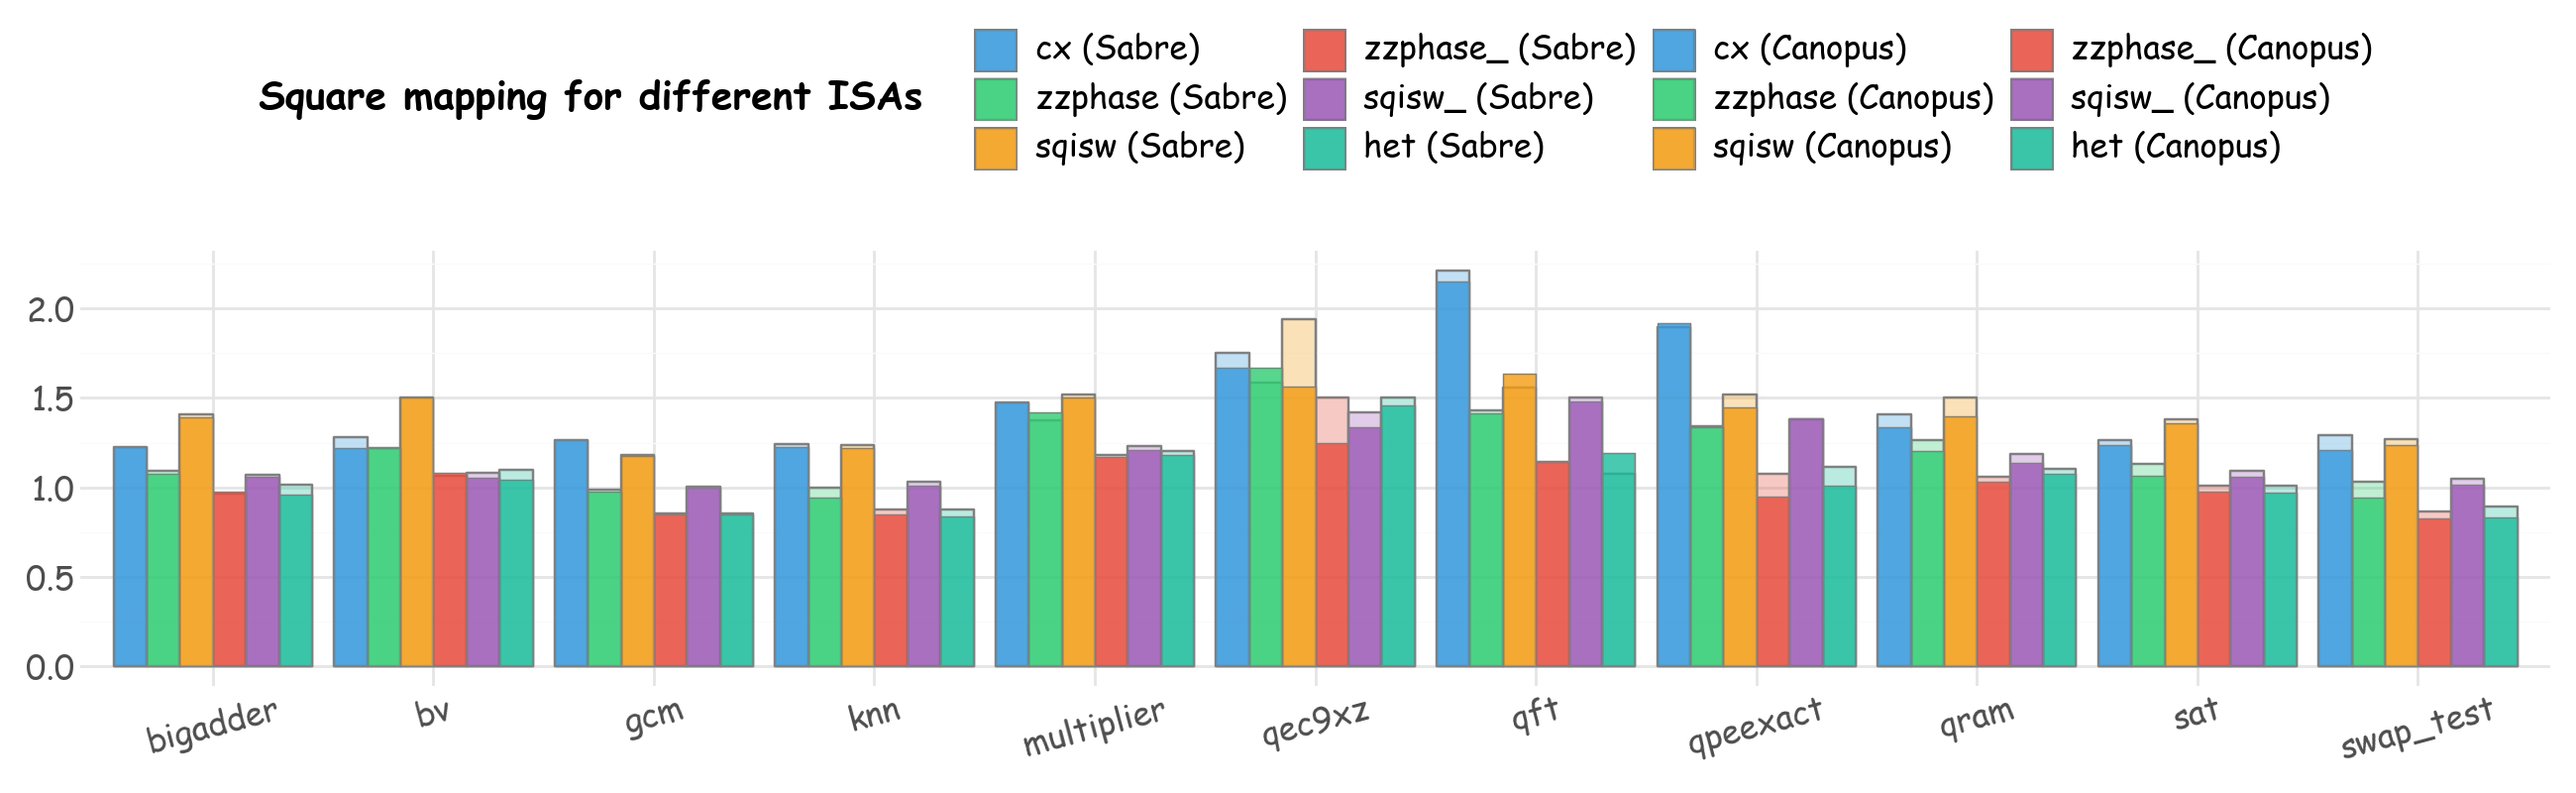

In [46]:
plot_program_overhead_grouped(result_canopus_nocomm_square, result_canopus_square, title='Square mapping')